# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns


# For calculating Chi-Squared Test, T-Test, ANOVA
import scipy.stats as stats

# calculate of skewness
from scipy.stats import skew 

# For data partitioning
from sklearn.model_selection import train_test_split

# For standardization
from sklearn.preprocessing import StandardScaler

# For saving model
import pickle

# For saving scaler
import joblib

In [2]:
df = pd.read_csv('project_dataset.csv', index_col='EmployeeID')
df.head()

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
EmployeeID,,,,,,,,,,,,,,,,,,,
1,41,Travel_Rarely,5993,4,17979,Sales,1,2,Life Sciences,2,Female,Sales Executive,Single,3,0,6,0,Yes,Yes
2,49,Travel_Frequently,5130,2,20520,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,Married,4,3,10,1,No,No
4,37,Travel_Rarely,2090,3,6270,Research & Development,2,2,Other,4,Male,Laboratory Technician,Single,3,3,0,0,Yes,Yes
5,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,Married,3,3,8,3,Yes,No
7,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Medical,1,Male,Laboratory Technician,Married,3,3,2,2,No,No


---

# Check Data Quality

In [3]:
#check missing values

df.isnull().sum()

Age                        0
BusinessTravel             0
MonthlyIncome              0
JobSatisfaction            0
Bonus                      0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvSatisfaction            0
Gender                     0
JobRole                    0
MaritalStatus              0
PerformanceRating          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
OverTime                   0
Attrition                  0
dtype: int64

In [4]:
#check duplicated rows

df[df.duplicated(keep=False)]

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
EmployeeID,,,,,,,,,,,,,,,,,,,


In [5]:
df.shape

(1470, 19)

## Data is clean. Proceed with EDA

--- 

# Perform Exploratory Data Analysis - Univariate Analysis

#### Class proportion `Gender` , `Attrition`, `Marital Status`, `BusinessTravel`, `Department`,  `EducationField`,  `JobRole`

Male      882
Female    588
Name: Gender, dtype: int64


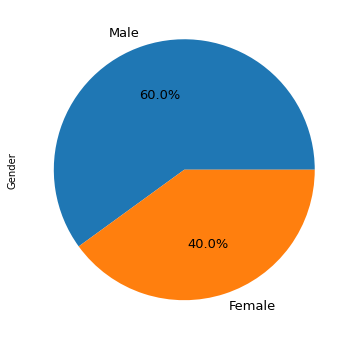

In [6]:
#Gender count


gender_count  = df['Gender'].value_counts()
print(gender_count)

#MaritalStatus Proportion

gender_prop = df['Gender'].value_counts(normalize=True)*100
gender_prop.plot(kind='pie',
                     autopct='%.1f%%',
                 figsize = (10,6),
                fontsize = 13)
plt.show()


No     1233
Yes     237
Name: Attrition, dtype: int64


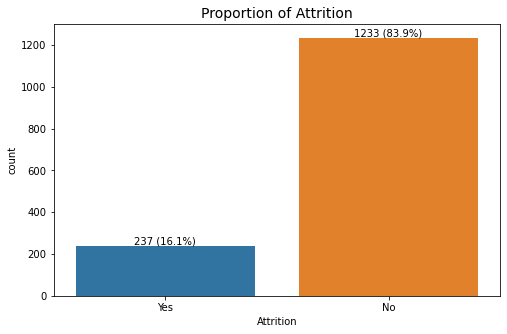

In [7]:
# plot bar for Attrition proportion

#Attrition count
attrition_count  = df['Attrition'].value_counts()
print(attrition_count)


#figure size
plt.figure(figsize=(8,5))

attrition_count = sns.countplot(x='Attrition', 
                         data=df)

abs_values = df['Attrition'].value_counts(ascending = True)
rel_values = df['Attrition'].value_counts(ascending = True, normalize=True).values*100
lbls = [f"{p[0]} ({p[1]:.1f}%)" for p in zip(abs_values, rel_values)]

attrition_count.bar_label(container=attrition_count.containers[0], labels=lbls)

#adding title
plt.title('Proportion of Attrition', size=14)


#set limit for y axis
plt.ylim([0,1300])
plt.show()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


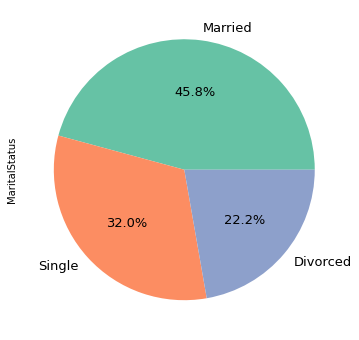

In [8]:
#MaritalStatus count

status_count  = df['MaritalStatus'].value_counts()
print(status_count)

#MaritalStatus Proportion

status_prop = df['MaritalStatus'].value_counts(normalize=True)*100
status_prop.plot(kind='pie',
                     autopct='%.1f%%',
                     colors=sns.color_palette('Set2'),
                 figsize = (10,6),
                fontsize = 13)
plt.show()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


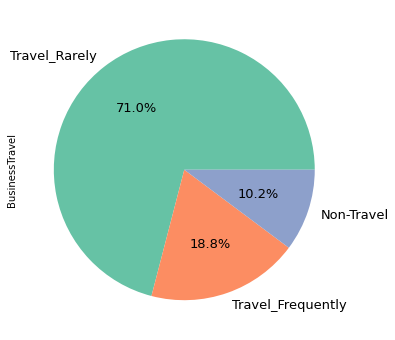

In [9]:
#BusinessTravel count

travel_count  = df['BusinessTravel'].value_counts()
print(travel_count)

#BusinessTravel Proportion

travel_prop = df['BusinessTravel'].value_counts(normalize=True)*100
travel_prop.plot(kind='pie',
                     autopct='%.1f%%',
                     colors=sns.color_palette('Set2'),
                 figsize = (10,6),
                fontsize = 13)
plt.show()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


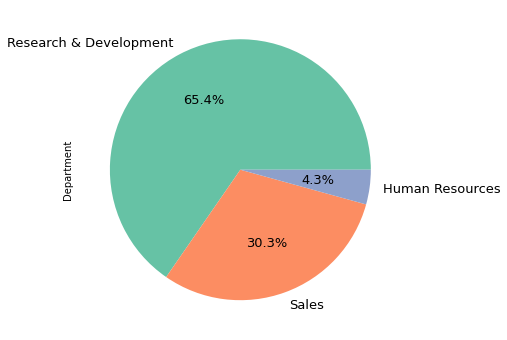

In [10]:
#department count

department_count  = df['Department'].value_counts()
print(department_count)

#Department Proportion

department_prop = df['Department'].value_counts(normalize=True)*100

department_prop.plot(kind='pie',
                     autopct='%.1f%%',
                     colors=sns.color_palette('Set2'),
                 figsize = (10,6),
                fontsize = 13)

plt.show()

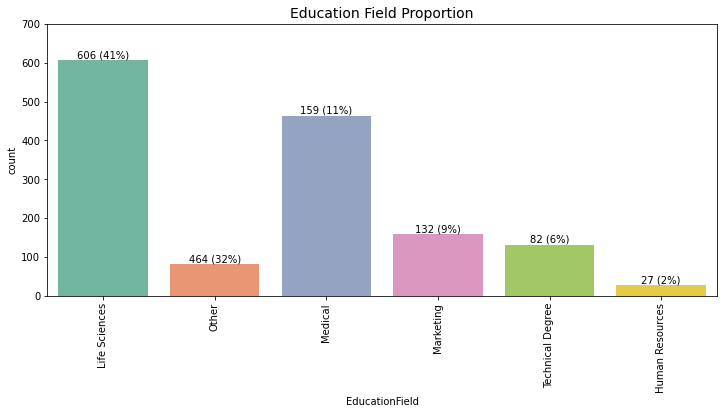

In [11]:
# plot bar for EducationField proportion

#figure size
plt.figure(figsize=(12,5))

eduField = sns.countplot(x='EducationField',
                         data=df,
                        palette ="Set2")

abs_values = df['EducationField'].value_counts()
rel_values = df['EducationField'].value_counts(normalize=True).values*100
lbls = [f"{p[0]} ({p[1]:.0f}%)" for p in zip(abs_values, rel_values)]

eduField.bar_label(container=eduField.containers[0], labels=lbls)

#adding title
plt.title('Education Field Proportion', size=14)

#rotate the xlabel
plt.xticks(rotation=90)


#set limit for y axis
plt.ylim([0,700])
plt.show()

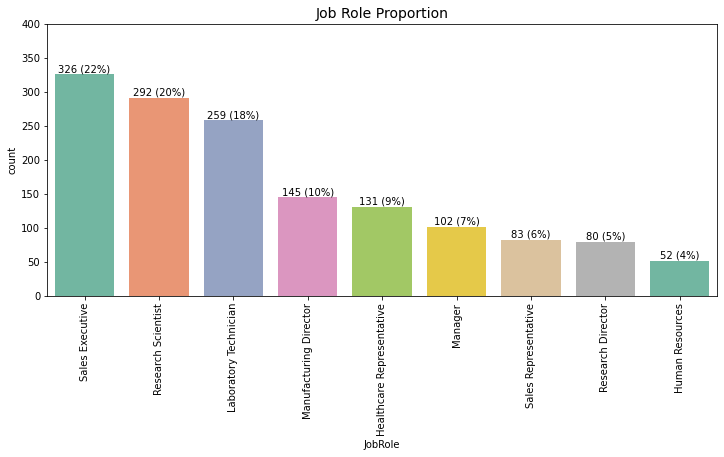

In [12]:
# plot bar for JobRole proportion

#figure size
plt.figure(figsize=(12,5))

job_role = sns.countplot(x='JobRole', 
                         data=df,
                         palette ="Set2")

abs_values = df['JobRole'].value_counts()
rel_values = df['JobRole'].value_counts(normalize=True).values*100
lbls = [f"{p[0]} ({p[1]:.0f}%)" for p in zip(abs_values, rel_values)]

job_role.bar_label(container=job_role.containers[0], labels=lbls) 

#adding title
plt.title('Job Role Proportion', size=14)

#rotate the xlabel
plt.xticks(rotation=90)


#set limit for y axis
plt.ylim([0,400])
plt.show()

# Mean, Median for `Age`, `MonthlyIncome`, `Bonus`, `YearsAtCompany`

In [13]:
#Print Descriptive Summary
df.describe().round(2)

,Age,MonthlyIncome,JobSatisfaction,Bonus,DistanceFromHome,Education,EnvSatisfaction,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,6502.93,2.73,20479.50,9.19,2.91,2.72,3.15,2.80,7.01,2.19
std,9.14,4707.96,1.10,15066.27,8.11,1.02,1.09,0.36,1.29,6.13,3.22
min,18.00,1009.00,1.00,3027.00,1.00,1.00,1.00,3.00,0.00,0.00,0.00
25%,30.00,2911.00,2.00,9333.75,2.00,2.00,2.00,3.00,2.00,3.00,0.00
50%,36.00,4919.00,3.00,15484.50,7.00,3.00,3.00,3.00,3.00,5.00,1.00
75%,43.00,8379.00,4.00,26103.75,14.00,4.00,4.00,3.00,3.00,9.00,3.00
max,60.00,19999.00,4.00,79892.00,29.00,5.00,4.00,4.00,6.00,40.00,15.00


# Distribution of `Age`, `MonthlyIncome` and `Bonus`

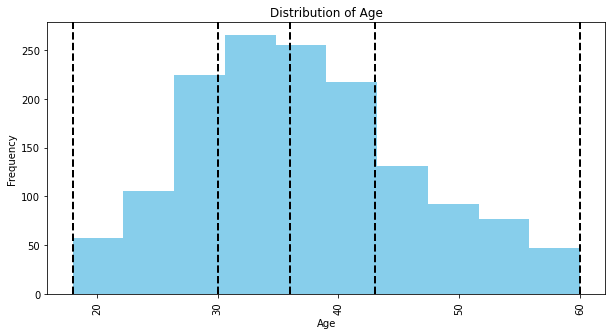

0.41286446154785084


In [14]:
#Distribution of Age

plt.figure(figsize=(10,5))
plt.hist(df['Age'], bins=10, color = 'skyblue')


plt.axvline(df['Age'].median(), color='k', linestyle='dashed', linewidth=2, label= 'Median')
plt.axvline(df['Age'].quantile(0.25), color='k', linestyle='dashed', linewidth=2, label= '25%')
plt.axvline(df['Age'].quantile(0.75), color='k', linestyle='dashed', linewidth=2, label= '75%')
plt.axvline(df['Age'].max(), color='k', linestyle='dashed', linewidth=2, label= 'Max')
plt.axvline(df['Age'].min(), color='k', linestyle='dashed', linewidth=2, label= 'Min')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=90) #rotating the xlabel
plt.show()

print(skew(df['Age'], bias=True))

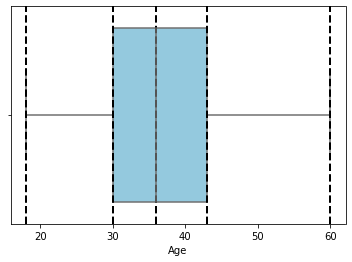

In [15]:
#Box Plot Age
sns.boxplot(x='Age',data=df, color='skyblue')

plt.axvline(df['Age'].median(), color='k', linestyle='dashed', linewidth=2, label= 'Median')
plt.axvline(df['Age'].quantile(0.25), color='k', linestyle='dashed', linewidth=2, label= '25%')
plt.axvline(df['Age'].quantile(0.75), color='k', linestyle='dashed', linewidth=2, label= '75%')
plt.axvline(df['Age'].max(), color='k', linestyle='dashed', linewidth=2, label= 'Max')
plt.axvline(df['Age'].min(), color='k', linestyle='dashed', linewidth=2, label= 'Min')

plt.show()

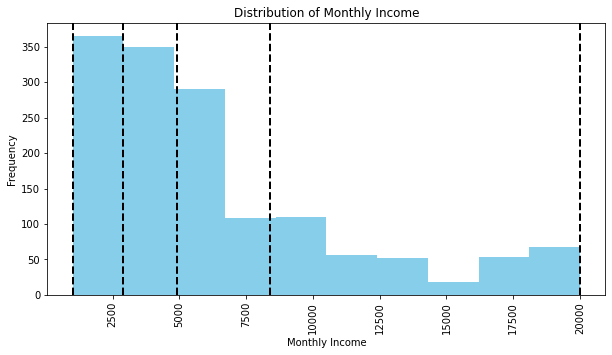

1.3684185123330814


In [16]:
# Distribution of MonthlyIncome


plt.figure(figsize=(10,5))
plt.hist(df['MonthlyIncome'], bins=10, color = 'skyblue')


plt.axvline(df['MonthlyIncome'].median(), color='k', linestyle='dashed', linewidth=2, label= 'Median')
plt.axvline(df['MonthlyIncome'].quantile(0.25), color='k', linestyle='dashed', linewidth=2, label= '25%')
plt.axvline(df['MonthlyIncome'].quantile(0.75), color='k', linestyle='dashed', linewidth=2, label= '75%')
plt.axvline(df['MonthlyIncome'].max(), color='k', linestyle='dashed', linewidth=2, label= 'Max')
plt.axvline(df['MonthlyIncome'].min(), color='k', linestyle='dashed', linewidth=2, label= 'Min')

plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.xticks(rotation=90) #rotating the xlabel
plt.show()

print(skew(df['MonthlyIncome'], bias=True))

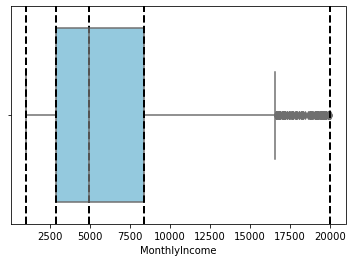

In [17]:
#Box Plot MonthlyIncome
sns.boxplot(x='MonthlyIncome',data=df, color='skyblue')

plt.axvline(df['MonthlyIncome'].median(), color='k', linestyle='dashed', linewidth=2, label= 'Median')
plt.axvline(df['MonthlyIncome'].quantile(0.25), color='k', linestyle='dashed', linewidth=2, label= '25%')
plt.axvline(df['MonthlyIncome'].quantile(0.75), color='k', linestyle='dashed', linewidth=2, label= '75%')
plt.axvline(df['MonthlyIncome'].max(), color='k', linestyle='dashed', linewidth=2, label= 'Max')
plt.axvline(df['MonthlyIncome'].min(), color='k', linestyle='dashed', linewidth=2, label= 'Min')

plt.show()

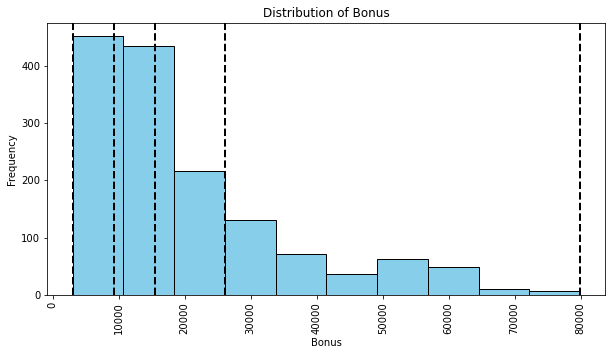

1.4578079733662461


In [18]:
# Distribution of Bonus


plt.figure(figsize=(10,5))
plt.hist(df['Bonus'], bins=10, edgecolor='black', color = 'skyblue')

plt.axvline(df['Bonus'].median(), color='k', linestyle='dashed', linewidth=2, label= 'Median')
plt.axvline(df['Bonus'].quantile(0.25), color='k', linestyle='dashed', linewidth=2, label= '25%')
plt.axvline(df['Bonus'].quantile(0.75), color='k', linestyle='dashed', linewidth=2, label= '75%')
plt.axvline(df['Bonus'].max(), color='k', linestyle='dashed', linewidth=2, label= 'Max')
plt.axvline(df['Bonus'].min(), color='k', linestyle='dashed', linewidth=2, label= 'Min')

plt.title('Distribution of Bonus')
plt.xlabel('Bonus')
plt.ylabel('Frequency')
plt.xticks(rotation=90) #rotating the xlabel
plt.show()

print(skew(df['Bonus'], bias=True))

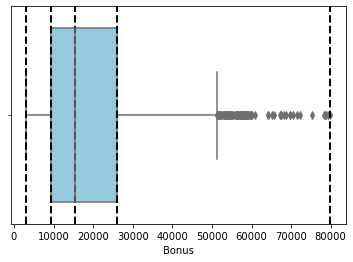

In [19]:
#Box Plot Bonus
sns.boxplot(x='Bonus',data=df, color='skyblue' )


plt.axvline(df['Bonus'].median(), color='k', linestyle='dashed', linewidth=2, label= 'Median')
plt.axvline(df['Bonus'].quantile(0.25), color='k', linestyle='dashed', linewidth=2, label= '25%')
plt.axvline(df['Bonus'].quantile(0.75), color='k', linestyle='dashed', linewidth=2, label= '75%')
plt.axvline(df['Bonus'].max(), color='k', linestyle='dashed', linewidth=2, label= 'Max')
plt.axvline(df['Bonus'].min(), color='k', linestyle='dashed', linewidth=2, label= 'Min')

plt.show()

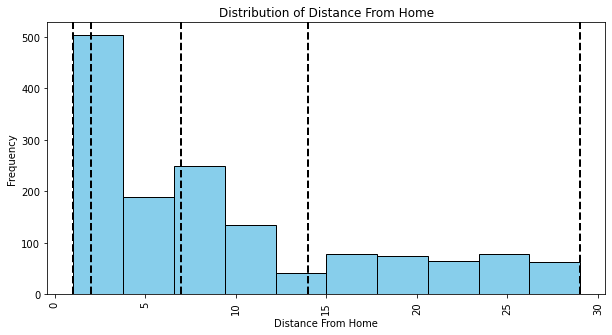

0.9571400469829039


In [20]:
# Distribution of DistanceFromHome


plt.figure(figsize=(10,5))
plt.hist(df['DistanceFromHome'], bins=10, edgecolor='black', color = 'skyblue')

plt.axvline(df['DistanceFromHome'].median(), color='k', linestyle='dashed', linewidth=2, label= 'Median')
plt.axvline(df['DistanceFromHome'].quantile(0.25), color='k', linestyle='dashed', linewidth=2, label= '25%')
plt.axvline(df['DistanceFromHome'].quantile(0.75), color='k', linestyle='dashed', linewidth=2, label= '75%')
plt.axvline(df['DistanceFromHome'].max(), color='k', linestyle='dashed', linewidth=2, label= 'Max')
plt.axvline(df['DistanceFromHome'].min(), color='k', linestyle='dashed', linewidth=2, label= 'Min')

plt.title('Distribution of Distance From Home')
plt.xlabel('Distance From Home')
plt.ylabel('Frequency')
plt.xticks(rotation=90) #rotating the xlabel
plt.show()

print(skew(df['DistanceFromHome'], bias=True))

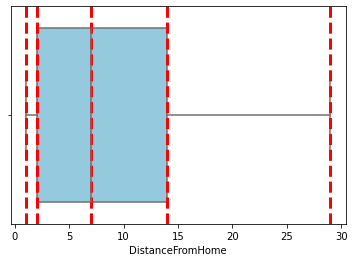

In [21]:
#Box Plot Distance From Home
sns.boxplot(x='DistanceFromHome',data=df, color='skyblue' )


plt.axvline(df['DistanceFromHome'].median(), color='r', linestyle='dashed', linewidth=3, label= 'Median')
plt.axvline(df['DistanceFromHome'].quantile(0.25), color='r', linestyle='dashed', linewidth=3, label= '25%')
plt.axvline(df['DistanceFromHome'].quantile(0.75), color='r', linestyle='dashed', linewidth=3, label= '75%')
plt.axvline(df['DistanceFromHome'].max(), color='r', linestyle='dashed', linewidth=3, label= 'Max')
plt.axvline(df['DistanceFromHome'].min(), color='r', linestyle='dashed', linewidth=3, label= 'Min')

plt.show()

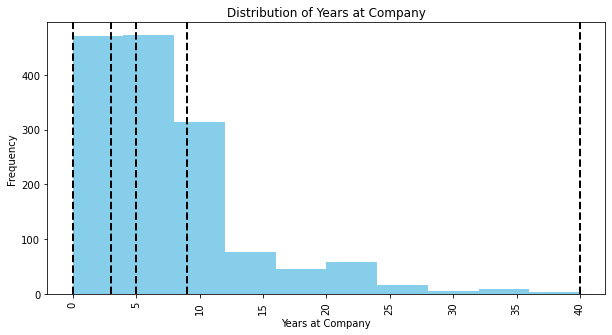

1.7627284034822992


In [22]:
#Distribution of YearsAtCompany

plt.figure(figsize=(10,5))
plt.hist(df['YearsAtCompany'], bins=10, color = 'skyblue')


plt.axvline(df['YearsAtCompany'].median(), color='k', linestyle='dashed', linewidth=2, label= 'Median')
plt.axvline(df['YearsAtCompany'].quantile(0.25), color='k', linestyle='dashed', linewidth=2, label= '25%')
plt.axvline(df['YearsAtCompany'].quantile(0.75), color='k', linestyle='dashed', linewidth=2, label= '75%')
plt.axvline(df['YearsAtCompany'].max(), color='k', linestyle='dashed', linewidth=2, label= 'Max')
plt.axvline(df['YearsAtCompany'].min(), color='k', linestyle='dashed', linewidth=2, label= 'Min')

plt.title('Distribution of Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Frequency')
plt.xticks(rotation=90) #rotating the xlabel
plt.show()

print(skew(df['YearsAtCompany'], bias=True))

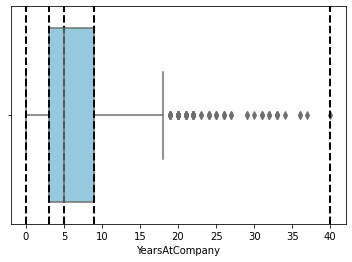

In [23]:
#Box Plot Distance From Home
sns.boxplot(x='YearsAtCompany',data=df, color='skyblue' )


plt.axvline(df['YearsAtCompany'].median(), color='k', linestyle='dashed', linewidth=2, label= 'Median')
plt.axvline(df['YearsAtCompany'].quantile(0.25), color='k', linestyle='dashed', linewidth=2, label= '25%')
plt.axvline(df['YearsAtCompany'].quantile(0.75), color='k', linestyle='dashed', linewidth=2, label= '75%')
plt.axvline(df['YearsAtCompany'].max(), color='k', linestyle='dashed', linewidth=2, label= 'Max')
plt.axvline(df['YearsAtCompany'].min(), color='k', linestyle='dashed', linewidth=2, label= 'Min')


plt.show()

In [24]:
df['YearsAtCompany'].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

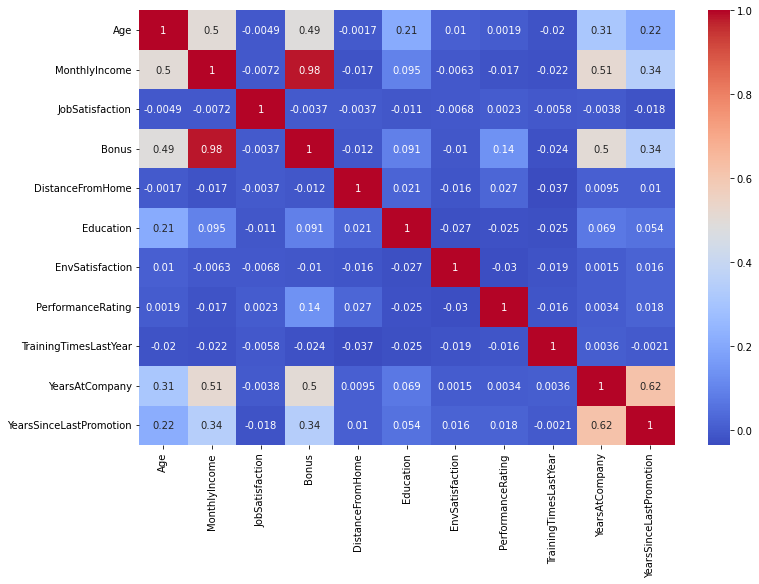

In [25]:
# Heatmap correlation
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

plt.show()

# MULTIVARIATE ANALYSIS (Independen T-Test & Chi Squared Test)

##  1. What is the relationship between `Age` and `MonthlyIncome`? Does `Age` affect `MonthlyIncome`?

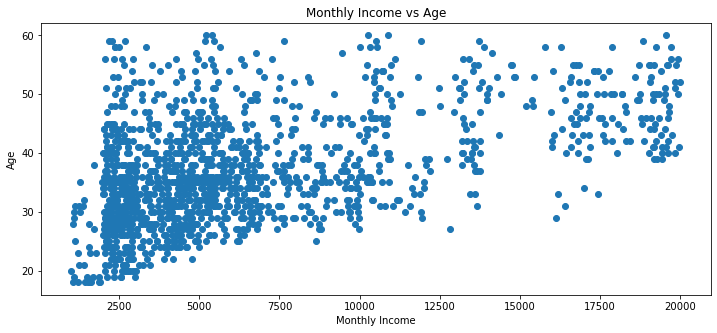

In [26]:
#Scatter plot Age vs MonthlyIncome

plt.figure(figsize=(12,5))
plt.scatter(df['MonthlyIncome'], df['Age'])

plt.title('Monthly Income vs Age')
plt.ylabel('Age')
plt.xlabel('Monthly Income')
plt.show()

The correlation coefficient is 0.5


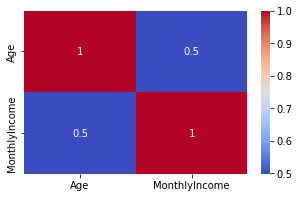

In [27]:
# Measure the strength relationship between age and monthlyincome

# create a dataframe for Age and MonthlyIncome
age_month = df[['Age', 'MonthlyIncome']]

# Compute correlation for Age and MonthlyIncome
corr_1 = df['Age'].corr(df['MonthlyIncome'])
print("The correlation coefficient is", (corr_1).round(2))

# Heatmap correlation
plt.figure(figsize=(5,3))

sns.heatmap(age_month.corr(),cmap='coolwarm', annot=True)

plt.show()

## 2. What is the relationship between `Age` and `Bonus`?  Does the `Age` affect the `Bonus`?

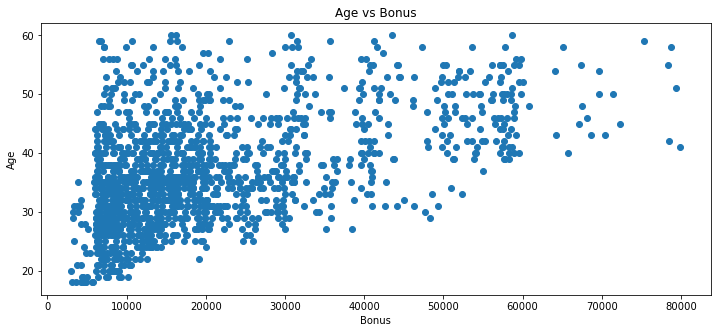

In [28]:
#Scatter plot Age vs Bonus

plt.figure(figsize=(12,5))
plt.scatter(df['Bonus'], df['Age'])

plt.title('Age vs Bonus')
plt.ylabel('Age')
plt.xlabel('Bonus')
plt.show()

The correlation coefficient is 0.49


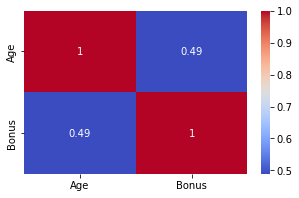

In [29]:
# Measure the strength relationship between age and monthlyincome

# create a dataframe for Age and MonthlyIncome
age_bonus=df[['Age', 'Bonus']]

# Compute correlation for Age and MonthlyIncome
corr_2 = df['Age'].corr(df['Bonus'])
print("The correlation coefficient is", (corr_2).round(2))

# Heatmap correlation
plt.figure(figsize=(5,3))

sns.heatmap(age_bonus.corr(),cmap='coolwarm', annot=True)

plt.show()

## 3. Which `Age` group affect employee's `Attrition`? 

  Attrition   Age
0        No  37.6
1       Yes  33.6


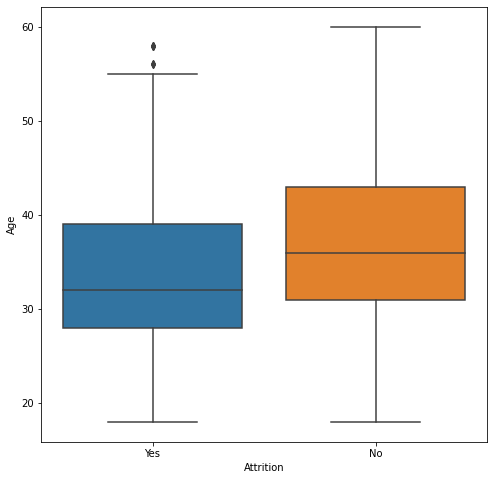

In [30]:
#Compute the mean of Age for each classes in Attrition (Yes & No)

meanAge_attrition = df.groupby('Attrition', as_index=False)['Age'].mean()
print(meanAge_attrition.round(1))


# Create boxplot

plt.figure(figsize=(8,8))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.show()

In [31]:
#Calculate levene test to get variance of each variable

print(stats.levene(df['Age'][df['Attrition']=='No'],
             df['Age'][df['Attrition']=='Yes'],
            center='mean'))

# Independence T-test

print(stats.ttest_ind(df['Age'][df['Attrition']=='No'],
             df['Age'][df['Attrition']=='Yes'],
             equal_var=True))

LeveneResult(statistic=1.1583170677572885, pvalue=0.2819916793250208)
Ttest_indResult(statistic=6.1786638353072165, pvalue=8.356308021103649e-10)


## 4.  Does `BusinessTravel` affect `attrition`?

In [32]:
# Calculate the counts of Gender by Attrition
travel_attrition = pd.crosstab(index=df['Attrition'], columns=df['BusinessTravel'])
print(travel_attrition)



print("\nPercentage")

# Calculate percentage of Gender based on Attrition
travel_attrition_prop = pd.crosstab(index=df['Attrition'], columns=df['BusinessTravel'], normalize='index')*100
travel = travel_attrition_prop.round(1)
print(travel)

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                     138                208            887
Yes                     12                 69            156

Percentage
BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                    11.2               16.9           71.9
Yes                    5.1               29.1           65.8


<Figure size 864x360 with 0 Axes>

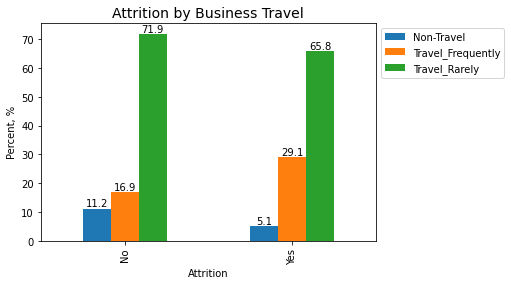

In [33]:
plt.figure(figsize=(12,5))

ax = travel.plot(kind='bar')
plt.title('Attrition by Business Travel', size=14)
plt.ylabel('Percent, %')
plt.legend(loc = 'upper left',  bbox_to_anchor=(1, 1))

# set the bar label
for c in ax.containers:
    ax.bar_label(c, label_type='edge')
plt.xticks(rotation=90)
plt.show()

## 4.1 Is there any significant difference of mean of `BusinessTravel` based on `Attrition`?

In [34]:
c, p, dof, expected = stats.chi2_contingency(travel_attrition)
p.round(2)

0.0

## 5.0 Does the `MonthlyIncome` affect the `Attrition`? 

  Attrition  MonthlyIncome
0        No        6832.74
1       Yes        4787.09


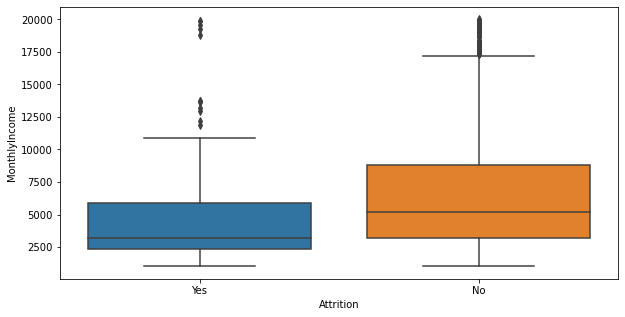

In [35]:
#Compute the mean of MonthlyIncome for each classes in Attrition (Yes & No)

meanIncome_attrition = df.groupby('Attrition', as_index=False)['MonthlyIncome'].mean()
print(meanIncome_attrition.round(2))

# Create boxplot

plt.figure(figsize=(10,5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.show()

## 5.1 Independence T-Test for `MonthlyIncome` and `Attrition`
+ Null Hypothesis - There is no significant difference of mean of MonthlyIncome between No and Yes 
+ Alternative Hypothesis -There is  significant difference of mean of MonthlyIncome between No and Yes

In [36]:
#Calculate levene test to get variance of each variable

print(stats.levene(df['MonthlyIncome'][df['Attrition']=='No'],
             df['MonthlyIncome'][df['Attrition']=='Yes'],
            center='mean'))

# Independence T-test

print(stats.ttest_ind(df['MonthlyIncome'][df['Attrition']=='No'],
             df['MonthlyIncome'][df['Attrition']=='Yes'],
             equal_var=False))


LeveneResult(statistic=26.31302358992364, pvalue=3.29070575711061e-07)
Ttest_indResult(statistic=7.482621586644742, pvalue=4.433588628286071e-13)


## 6.0  Does the `JobSatisfaction` affect employee's `Attrition`? 

  Attrition  JobSatisfaction
0        No             2.78
1       Yes             2.47


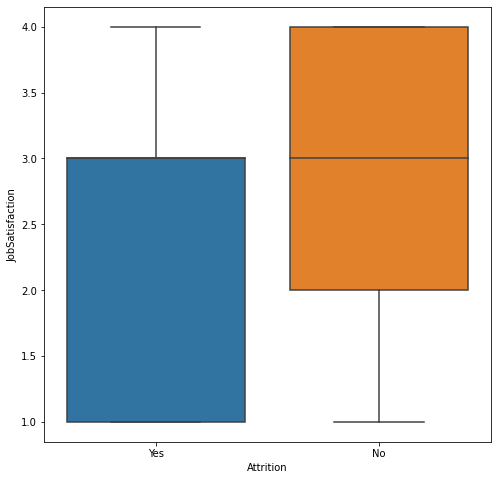

In [37]:
#Compute the mean of Job Satisfaction for each classes in Attrition (Yes & No)

meanJobs_attrition = df.groupby('Attrition', as_index=False)['JobSatisfaction'].mean()
print(meanJobs_attrition.round(2))

# Create boxplot
plt.figure(figsize=(8,8))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.show()

In [38]:
#Calculate levene test to get variance of each variable

print(stats.levene(df['JobSatisfaction'][df['Attrition']=='No'],
             df['JobSatisfaction'][df['Attrition']=='Yes'],
            center='mean'))

# Independence T-test

print(stats.ttest_ind(df['JobSatisfaction'][df['Attrition']=='No'],
             df['JobSatisfaction'][df['Attrition']=='Yes'],
             equal_var=True))

LeveneResult(statistic=2.4265959250716285, pvalue=0.11950724122969081)
Ttest_indResult(statistic=3.9862267630568273, pvalue=7.043066741731151e-05)


## 7.0 Does the `Bonus` affect employee's `Attrition`? 

  Attrition    Bonus
0        No  21544.0
1       Yes  14941.7


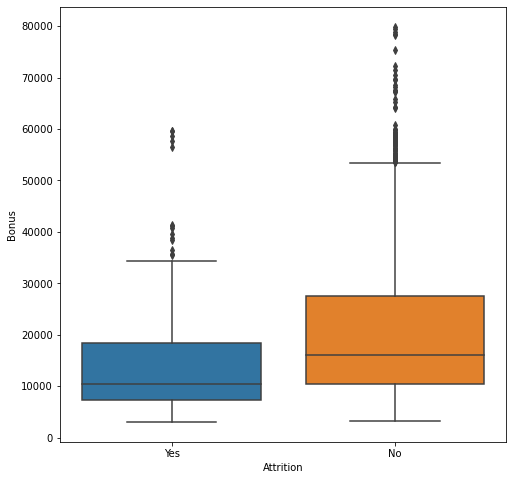

In [39]:
#Compute the mean of Bonus for each classes (Yes & No)

meanBonus_attrition = df.groupby('Attrition', as_index=False)['Bonus'].mean()
print(meanBonus_attrition.round(1))

# Plot histogram for better visual
plt.figure(figsize=(8,8))
sns.boxplot(x='Attrition', y='Bonus', data=df)
plt.show()

In [40]:
#Calculate levene test to get variance of each variable

print(stats.levene(df['Bonus'][df['Attrition']=='No'],
             df['Bonus'][df['Attrition']=='Yes'],
            center='mean'))

# Independence T-test

print(stats.ttest_ind(df['Bonus'][df['Attrition']=='No'],
             df['Bonus'][df['Attrition']=='Yes'],
             equal_var=False))

LeveneResult(statistic=31.611860459322592, pvalue=2.2502347973082613e-08)
Ttest_indResult(statistic=7.831954710068883, pvalue=3.692333845137077e-14)


## 8.0 Which `Department`have higher `Attrition` rates? 

In [41]:
# Calculate the counts of Department by Attrition
department_attrition = pd.crosstab(index=df['Department'], columns=df['Attrition'])
print(department_attrition)

print("\nPercentage")

# Calculate percentage of Department based on Attrition
department_attrition_prop = pd.crosstab(index=df['Department'], columns=df['Attrition'], normalize='index')*100
z= department_attrition_prop.round(1)
print(z)

Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92

Percentage
Attrition                 No   Yes
Department                        
Human Resources         81.0  19.0
Research & Development  86.2  13.8
Sales                   79.4  20.6


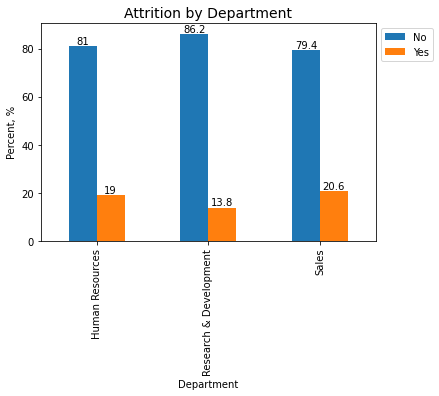

In [42]:
ax = z.plot(kind='bar')
plt.title('Attrition by Department', size=14)
plt.ylabel('Percent, %')
plt.legend(loc = 'upper left',  bbox_to_anchor=(1, 1))

# set the bar label
for c in ax.containers:
    ax.bar_label(c, label_type='edge')
plt.xticks(rotation=90)
plt.show()

## 8.1 Is there any significant difference of `Attrition` based on `Department`?

In [43]:
c, p, dof, expected = stats.chi2_contingency(department_attrition)
p.round(2)

0.0

## 9.0  Is the `DistanceFromHome` affect employee's `Attrition`? 

  Attrition  DistanceFromHome
0        No               8.9
1       Yes              10.6


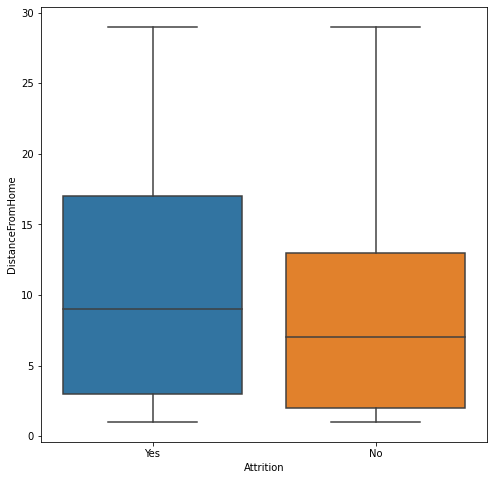

In [44]:
#Compute the mean of DistanceFromHome for each classes (Yes & No)

meanDistance_attrition = df.groupby('Attrition', as_index=False)['DistanceFromHome'].mean()
print(meanDistance_attrition.round(1))

# Plot histogram for better visual

plt.figure(figsize=(8,8))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.show()

In [45]:
#Calculate levene test to get variance of each variable

print(stats.levene(df['DistanceFromHome'][df['Attrition']=='No'],
             df['DistanceFromHome'][df['Attrition']=='Yes'],
            center='mean'))


# Independence T-test

print(stats.ttest_ind(df['DistanceFromHome'][df['Attrition']=='No'],
             df['DistanceFromHome'][df['Attrition']=='Yes'],
             equal_var=False))

LeveneResult(statistic=4.974146689763782, pvalue=0.025879557896104303)
Ttest_indResult(statistic=-2.888183062817627, pvalue=0.004136511971511406)


## 10.0  Does the `EducationField` affect employee's `Attrition`? 

Attrition          No  Yes
EducationField            
Human Resources    20    7
Life Sciences     517   89
Marketing         124   35
Medical           401   63
Other              71   11
Technical Degree  100   32

Percentage
Attrition           No   Yes
EducationField              
Human Resources   74.1  25.9
Life Sciences     85.3  14.7
Marketing         78.0  22.0
Medical           86.4  13.6
Other             86.6  13.4
Technical Degree  75.8  24.2


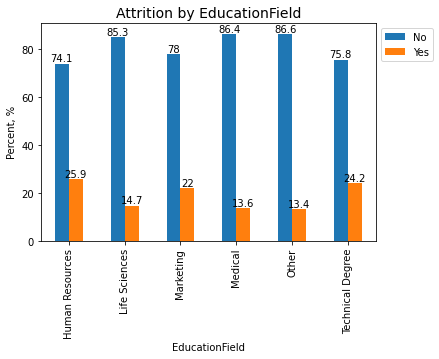

In [46]:
# Calculate the counts of EducationField by Attrition
eduField_attrition = pd.crosstab(index=df['EducationField'], columns=df['Attrition'])
print(eduField_attrition)

print("\nPercentage")

# Calculate percentage of Department based on Attrition
eduField_attrition_prop = pd.crosstab(index=df['EducationField'], columns=df['Attrition'], normalize='index')*100
eduField= eduField_attrition_prop.round(1)
print(eduField)

ax = eduField.plot(kind='bar')
plt.title('Attrition by EducationField', size=14)
plt.ylabel('Percent, %')
plt.legend(loc = 'upper left',  bbox_to_anchor=(1, 1))

# set the bar label
for c in ax.containers:
    ax.bar_label(c, label_type='edge')
plt.xticks(rotation=90)
plt.show()

## 10.1 Is there any significant difference of `Attrition` based on `EducationField`?

In [47]:
c, p, dof, expected = stats.chi2_contingency(eduField_attrition)
p.round(2)

0.01

## 11.0 Is the `EnvSatisfaction` affect employee's `Attrition`? 

  Attrition  EnvSatisfaction
0        No              2.8
1       Yes              2.5


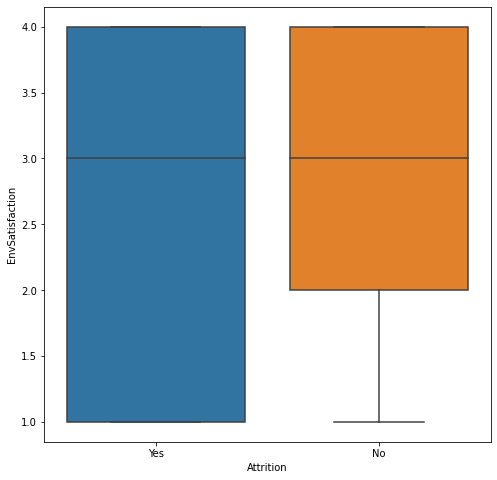

In [48]:
#Compute the mean of EnvSatisfaction for each classes (Yes & No)

meanEnv_attrition = df.groupby('Attrition', as_index=False)['EnvSatisfaction'].mean()
print(meanEnv_attrition.round(1))


# Plot histogram for better visual

plt.figure(figsize=(8,8))
sns.boxplot(x='Attrition', y='EnvSatisfaction', data=df)
plt.show()

In [49]:
#Calculate levene test to get variance of each variable

print(stats.levene(df['EnvSatisfaction'][df['Attrition']=='No'],
             df['EnvSatisfaction'][df['Attrition']=='Yes'],
            center='mean'))

# Independence T-test

print(stats.ttest_ind(df['EnvSatisfaction'][df['Attrition']=='No'],
             df['EnvSatisfaction'][df['Attrition']=='Yes'],
                equal_var=False))

LeveneResult(statistic=13.678094134249502, pvalue=0.00022496812287863818)
Ttest_indResult(statistic=3.7512571857971873, pvalue=0.0002092053345883392)


## 12.0 Which `Gender` has high `Attrition` rate?


1470
Gender     Female  Male
Attrition              
No            501   732
Yes            87   150
Gender     Female  Male
Attrition              
No           40.6  59.4
Yes          36.7  63.3


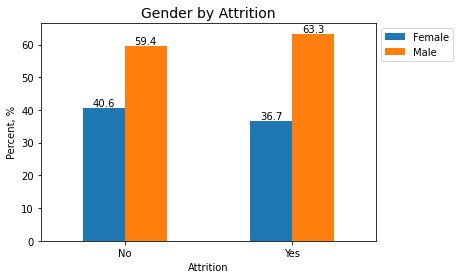

In [50]:
#Calculate total employee
total_employee =len(df)
print(total_employee)

# Calculate the counts of Gender by Attrition
gender_attrition = pd.crosstab(index=df['Attrition'], columns=df['Gender'])
print(gender_attrition)

# Calculate percentage of Gender based on Attrition
gender_attrition_prop = pd.crosstab(index=df['Attrition'], columns=df['Gender'], normalize='index')*100
gen = gender_attrition_prop.round(1)
print(gen)


ax = gen.plot(kind='bar')
plt.title('Gender by Attrition', size=14)
plt.ylabel('Percent, %')
plt.legend(loc = 'upper left',  bbox_to_anchor=(1, 1))

# set the bar label
for c in ax.containers:
    ax.bar_label(c, label_type='edge')
plt.xticks(rotation=0)
plt.show()


## 12.1 Is there any significant difference of mean`Gender` based on `Attrition`?

In [51]:
c, p, dof, expected = stats.chi2_contingency(gender_attrition)
p.round(2)

0.29

 ## 13.0. Which `JobRole has higher `Attrition` rates?

In [52]:
# Calculate the counts of Gender by Attrition
role_attrition = pd.crosstab(index=df['Attrition'], columns=df['JobRole'])
role_attrition

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,122,40,197,97,135,78,245,269,50
Yes,9,12,62,5,10,2,47,57,33


In [53]:
# Calculate percentage of Gender based on Attrition
role_attrition_prop = pd.crosstab(index=df['Attrition'], columns=df['JobRole'], normalize='index')*100
role = role_attrition_prop.round(1)
role

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,9.9,3.2,16.0,7.9,10.9,6.3,19.9,21.8,4.1
Yes,3.8,5.1,26.2,2.1,4.2,0.8,19.8,24.1,13.9


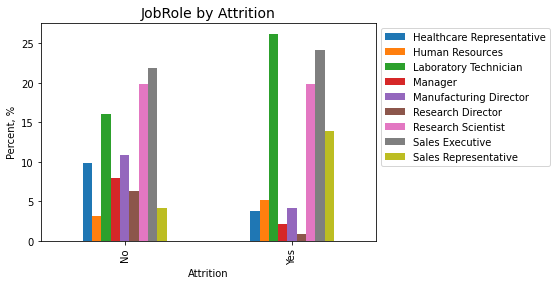

In [54]:
ax = role.plot(kind='bar')
plt.title('JobRole by Attrition', size=14)
plt.ylabel('Percent, %')
plt.legend(loc = 'upper left',  bbox_to_anchor=(1, 1))


plt.xticks(rotation=90)
plt.show()

## 13.1 Is there any significant difference of mean of `JobRole` based on `Attrition`?

In [55]:
c, p, dof, expected = stats.chi2_contingency(role_attrition)
p

2.752481638050657e-15

In [56]:
# Calculate the counts of BusinessTravel by JobRole
travel_jobRole = pd.crosstab(index=df['JobRole'], columns=df['BusinessTravel'])
travel_jobRole

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
JobRole,,,
Healthcare Representative,15,26,90
Human Resources,4,10,38
Laboratory Technician,28,51,180
Manager,12,13,77
Manufacturing Director,13,29,103
Research Director,6,12,62
Research Scientist,28,54,210
Sales Executive,39,59,228
Sales Representative,5,23,55


In [57]:
# Calculate percentage of BusinessTravel by JobRole
travel_jobRole_prop = pd.crosstab(index=df['JobRole'], columns=df['BusinessTravel'], normalize='index')*100
travel_job = travel_jobRole_prop.round(1)
travel_job

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
JobRole,,,
Healthcare Representative,11.5,19.8,68.7
Human Resources,7.7,19.2,73.1
Laboratory Technician,10.8,19.7,69.5
Manager,11.8,12.7,75.5
Manufacturing Director,9.0,20.0,71.0
Research Director,7.5,15.0,77.5
Research Scientist,9.6,18.5,71.9
Sales Executive,12.0,18.1,69.9
Sales Representative,6.0,27.7,66.3


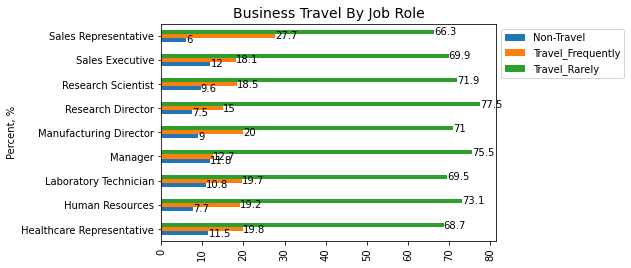

In [58]:
ax = travel_job.plot(kind='barh')
plt.title('Business Travel By Job Role', size=14)
plt.ylabel('Percent, %')
plt.legend(loc = 'upper left',  bbox_to_anchor=(1, 1))

# set the bar label
for c in ax.containers:
    ax.bar_label(c, label_type='edge')
plt.xticks(rotation=90)
plt.show()

## 14.0 Which `marital status` have higher` attrition` rates?

MaritalStatus  Divorced  Married  Single
Attrition                               
No                  294      589     350
Yes                  33       84     120

Percentage
MaritalStatus  Divorced  Married  Single
Attrition                               
No                 23.8     47.8    28.4
Yes                13.9     35.4    50.6


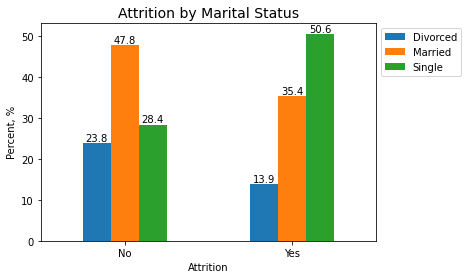

In [59]:
# Calculate the counts of MaritalStatus by Attrition
marital_attrition = pd.crosstab(index=df['Attrition'], columns=df['MaritalStatus'])
print(marital_attrition)

print("\nPercentage")

# Calculate percentage of MaritalStatus based on Attrition
marital_attrition_prop = pd.crosstab(index=df['Attrition'], columns=df['MaritalStatus'], normalize='index')*100
y = marital_attrition_prop.round(1)
print(y)

ax = y.plot(kind='bar')
plt.title('Attrition by Marital Status', size=14)
plt.ylabel('Percent, %')
plt.legend(loc = 'upper left',  bbox_to_anchor=(1, 1))

# set the bar label
for c in ax.containers:
    ax.bar_label(c, label_type='edge')
plt.xticks(rotation=0)
plt.show()

## 14.1 Is there any significant difference of `MaritalStatus` based on `Attrition`?

In [60]:
c, p, dof, expected = stats.chi2_contingency(marital_attrition)
p

9.45551106034083e-11

## 15. Does `YearsAtCompany` influence employee `Attrition`?

  Attrition  YearsAtCompany
0        No        7.369019
1       Yes        5.130802


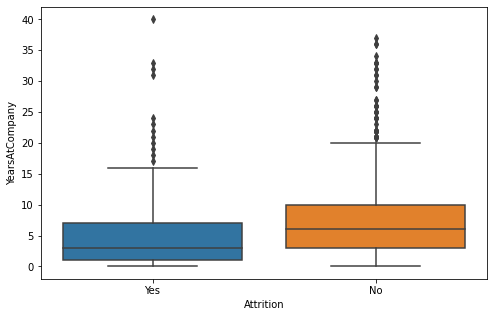

In [61]:
#Compute the mean of YearsAtCompany for each classes in Attrition (Yes & No)

meanYears_attrition = df.groupby('Attrition', as_index=False)['YearsAtCompany'].mean()
print(meanYears_attrition)

# Plot histogram for better visual
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.show()

## 15.1 Independence T-Test for `YearsAtCompany` and `Attrition`
+ Null Hypothesis - There is no significant difference of mean of YearsAtCompany between No and Yes 
+ Alternative Hypothesis -There is  significant difference of mean of YearsAtCompany between No and Yes

In [62]:
#Calculate levene test to get variance of each variable

print(stats.levene(df['YearsAtCompany'][df['Attrition']=='No'],
             df['YearsAtCompany'][df['Attrition']=='Yes'],
            center='mean'))

# Independence T-test
print(stats.ttest_ind(df['YearsAtCompany'][df['Attrition']=='No'],
             df['YearsAtCompany'][df['Attrition']=='Yes'],
             equal_var=True))

LeveneResult(statistic=2.5049476586425445, pvalue=0.11370465713766563)
Ttest_indResult(statistic=5.1963086670254235, pvalue=2.3188716103863033e-07)


## 16.0 Does `YearsSinceLastPromotion` influence employee's attrition?

  Attrition  YearsSinceLastPromotion
0        No                 2.234388
1       Yes                 1.945148


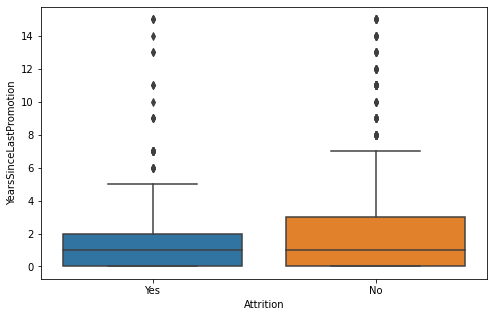

In [63]:
#Compute the mean of YearsSinceLastPromotion for each classes in Attrition (Yes & No)

meanEdu_attrition = df.groupby('Attrition', as_index=False)['YearsSinceLastPromotion'].mean()
print(meanEdu_attrition)

# Create boxplot

plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df)
plt.show()

## 16.1 Independence T-Test for `YearsSinceLastPromotion` and `Attrition`
+ Null Hypothesis - There is no significant difference of mean of YearsSinceLastPromotion between No and Yes 
+ Alternative Hypothesis -There is  significant difference of mean of YearsSinceLastPromotion  between No and Yes

In [64]:
#Calculate levene test to get variance of each variable

print(stats.levene(df['YearsSinceLastPromotion'][df['Attrition']=='No'],
             df['YearsSinceLastPromotion'][df['Attrition']=='Yes'],
            center='mean'))

# Independence T-test

print(stats.ttest_ind(df['YearsSinceLastPromotion'][df['Attrition']=='No'],
             df['YearsSinceLastPromotion'][df['Attrition']=='Yes'],
             equal_var=True))


LeveneResult(statistic=1.2865078146687527, pvalue=0.25687769398884447)
Ttest_indResult(statistic=1.2657876620135298, pvalue=0.2057899591624936)


## 17.0 Does `Overtime` influence employee's `Attrition`?

OverTime    No  Yes
Attrition          
No         944  289
Yes        110  127

Percentage
0


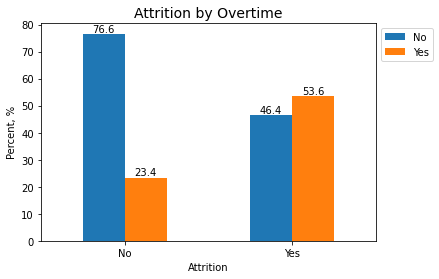

In [65]:
# Calculate the counts of Overtime by Attrition
overtime_attrition = pd.crosstab(index=df['Attrition'], columns=df['OverTime'])
print(overtime_attrition)

print("\nPercentage")

# Calculate percentage of Overtime based on Attrition
overtime_attrition_prop = pd.crosstab(index=df['Attrition'], columns=df['OverTime'], normalize='index')*100
o = overtime_attrition_prop.round(1)
print(0)

ax = o.plot(kind='bar')
plt.title('Attrition by Overtime' , size=14)
plt.ylabel('Percent, %')
plt.legend(loc = 'upper left',  bbox_to_anchor=(1, 1))

# set the bar label
for c in ax.containers:
    ax.bar_label(c, label_type='edge')
plt.xticks(rotation=0)
plt.show()

In [66]:
## 17.1 Is there any significant difference of `Overtime` based on `Attrition`?

In [67]:
c, p, dof, expected = stats.chi2_contingency(overtime_attrition)
c,p.round(2),dof,expected

(87.56429365828768,
 0.0,
 1,
 array([[884.06938776, 348.93061224],
        [169.93061224,  67.06938776]]))

-------

# Machine Learning - Classification

### To predict the probability of an employee leaving the company

List of variables affecting Attrition

+ Age
+ BusinessTravel
+ MonthlyIncome 
+ JobSatisfaction
+ Bonus 
+ Department
+ DistanceFromHome
+ EnvSatisfaction
+ MaritalStatus
+ YearsAtCompany
+ OverTime

In [68]:
#list of variables

df.columns

Index(['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvSatisfaction', 'Gender', 'JobRole', 'MaritalStatus',
       'PerformanceRating', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'OverTime', 'Attrition'],
      dtype='object')

In [69]:
# Create a new dataframe with new list of variables        

df2 = df[['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus', 'Department',
        'DistanceFromHome','EnvSatisfaction','MaritalStatus','YearsAtCompany', 'OverTime', 'Attrition']] 

In [70]:
df2.head(5)

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,EnvSatisfaction,MaritalStatus,YearsAtCompany,OverTime,Attrition
EmployeeID,,,,,,,,,,,,
1,41,Travel_Rarely,5993,4,17979,Sales,1,2,Single,6,Yes,Yes
2,49,Travel_Frequently,5130,2,20520,Research & Development,8,3,Married,10,No,No
4,37,Travel_Rarely,2090,3,6270,Research & Development,2,4,Single,0,Yes,Yes
5,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Married,8,Yes,No
7,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Married,2,No,No


In [71]:
df2['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

## Assign input and output


In [72]:

x = df2.iloc[:,:-1]
y = df2.iloc[:, -1]

In [73]:
x

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,EnvSatisfaction,MaritalStatus,YearsAtCompany,OverTime
EmployeeID,,,,,,,,,,,
1,41,Travel_Rarely,5993,4,17979,Sales,1,2,Single,6,Yes
2,49,Travel_Frequently,5130,2,20520,Research & Development,8,3,Married,10,No
4,37,Travel_Rarely,2090,3,6270,Research & Development,2,4,Single,0,Yes
5,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Married,8,Yes
7,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Married,2,No
...,...,...,...,...,...,...,...,...,...,...,...
2061,36,Travel_Frequently,2571,4,7713,Research & Development,23,3,Married,5,No
2062,39,Travel_Rarely,9991,1,29973,Research & Development,6,4,Married,7,No
2064,27,Travel_Rarely,6142,2,24568,Research & Development,4,2,Married,6,Yes


In [74]:
y.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

## Transform Categorical to Encoded Dummy Numeric Variable

In [75]:
#Handling Categorical Data 

x = pd.get_dummies(x,drop_first=True)
x.head(10)

,Age,MonthlyIncome,JobSatisfaction,Bonus,DistanceFromHome,EnvSatisfaction,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeID,,,,,,,,,,,,,,
1,41,5993,4,17979,1,2,6,0,1,0,1,0,1,1
2,49,5130,2,20520,8,3,10,1,0,1,0,1,0,0
4,37,2090,3,6270,2,4,0,0,1,1,0,0,1,1
5,33,2909,3,8727,3,4,8,1,0,1,0,1,0,1
7,27,3468,2,10404,2,1,2,0,1,1,0,1,0,0
8,32,3068,4,9204,2,4,7,1,0,1,0,0,1,0
10,59,2670,1,10680,3,3,1,0,1,1,0,1,0,1
11,30,2693,3,10772,24,4,1,0,1,1,0,0,0,0
12,38,9526,3,38104,23,4,9,1,0,1,0,0,1,0


## Data Partitioning

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0, stratify = y)

In [77]:
x_train.shape

(1176, 14)

In [78]:
y_train.value_counts()

No     986
Yes    190
Name: Attrition, dtype: int64

In [79]:
y_train

EmployeeID
329      No
757      No
1319    Yes
1880     No
1783    Yes
       ... 
593     Yes
602      No
807      No
689      No
1127    Yes
Name: Attrition, Length: 1176, dtype: object

In [80]:
y_test.value_counts()

No     247
Yes     47
Name: Attrition, dtype: int64

## Feature scaling for train set

In [81]:
# Feature scaling for train set - to ensure all variables are in the same magnitude

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [82]:
x_train[2]

array([ 1.62586005,  0.39968402, -0.62751633,  0.3155723 , -0.52635304,
       -0.66255557,  0.131221  , -0.48507125,  0.64168895, -1.37715349,
        1.53311035, -0.918292  ,  1.44171219,  1.56806362])

## Algorithm Training Using Train Set (x_train) 

In [83]:
from sklearn.linear_model import LogisticRegression

class_model = LogisticRegression(random_state=0)
class_model.fit(x_train, y_train)

LogisticRegression(random_state=0)

#### Feature scaling for test set (x_test, y_test)

In [84]:
x_test = scaler.transform(x_test)
x_test[2]

array([ 0.43098869, -0.7891494 ,  1.17899336, -0.80862056, -0.89465401,
       -0.66255557, -0.02688955, -0.48507125,  0.64168895,  0.72613547,
       -0.65226877, -0.918292  , -0.69361972,  1.56806362])

# Apply Test Set

In [85]:
y_prediction=class_model.predict(x_test)
y_prediction #response

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No

In [86]:
#Dataframe of Predicted Output and Actual Output for Test set

df2_validate = pd.DataFrame({'Actual':y_test,'Predicted':y_prediction})


#Create Data Frame
df2_validate['Predicted']=df2_validate['Predicted']

df2_validate.head(100)

,Actual,Predicted
EmployeeID,,
1256,No,No
844,No,No
927,Yes,No
1200,Yes,No
1497,No,No
...,...,...
532,No,No
977,Yes,No
1775,No,No


# Performance Validation - Confusion Matrix

In [87]:
attrition_performance_validation=pd.crosstab(y_prediction, y_test)
attrition_performance_validation

Attrition,No,Yes
row_0,,
No,245,40
Yes,2,7


In [88]:
# Generate Results

from sklearn.metrics import classification_report

print(classification_report(y_true = y_test, y_pred=y_prediction))

              precision    recall  f1-score   support

          No       0.86      0.99      0.92       247
         Yes       0.78      0.15      0.25        47

    accuracy                           0.86       294
   macro avg       0.82      0.57      0.59       294
weighted avg       0.85      0.86      0.81       294



--------

## Algorithm Training for Naive Bayes

In [89]:
# Create a new dataframe with new list of variables (sama as Logistic Regresion)

df3 = df[['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus', 'Department',
        'DistanceFromHome','EnvSatisfaction','MaritalStatus','YearsAtCompany', 'OverTime', 'Attrition']] 

In [90]:
# assign input and output

x1 = df3.iloc[:,:-1]
y1 = df3.iloc[:, -1]

In [91]:
x1

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,EnvSatisfaction,MaritalStatus,YearsAtCompany,OverTime
EmployeeID,,,,,,,,,,,
1,41,Travel_Rarely,5993,4,17979,Sales,1,2,Single,6,Yes
2,49,Travel_Frequently,5130,2,20520,Research & Development,8,3,Married,10,No
4,37,Travel_Rarely,2090,3,6270,Research & Development,2,4,Single,0,Yes
5,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Married,8,Yes
7,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Married,2,No
...,...,...,...,...,...,...,...,...,...,...,...
2061,36,Travel_Frequently,2571,4,7713,Research & Development,23,3,Married,5,No
2062,39,Travel_Rarely,9991,1,29973,Research & Development,6,4,Married,7,No
2064,27,Travel_Rarely,6142,2,24568,Research & Development,4,2,Married,6,Yes


In [92]:
y1.shape

(1470,)

In [93]:
#Transform Categorical to Encoded Dummy Numeric Variable


x1 = pd.get_dummies(x1,drop_first=True)
x1.head(10)

,Age,MonthlyIncome,JobSatisfaction,Bonus,DistanceFromHome,EnvSatisfaction,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeID,,,,,,,,,,,,,,
1,41,5993,4,17979,1,2,6,0,1,0,1,0,1,1
2,49,5130,2,20520,8,3,10,1,0,1,0,1,0,0
4,37,2090,3,6270,2,4,0,0,1,1,0,0,1,1
5,33,2909,3,8727,3,4,8,1,0,1,0,1,0,1
7,27,3468,2,10404,2,1,2,0,1,1,0,1,0,0
8,32,3068,4,9204,2,4,7,1,0,1,0,0,1,0
10,59,2670,1,10680,3,3,1,0,1,1,0,1,0,1
11,30,2693,3,10772,24,4,1,0,1,1,0,0,0,0
12,38,9526,3,38104,23,4,9,1,0,1,0,0,1,0


In [94]:
#Data partition - split data into 80:20

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.2, random_state=0, stratify = y1)

In [95]:
x1_train.head()

,Age,MonthlyIncome,JobSatisfaction,Bonus,DistanceFromHome,EnvSatisfaction,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeID,,,,,,,,,,,,,,
329,52,19068,3,57204,2,1,33,0,0,0,1,0,1,1
757,34,6142,3,18426,8,2,5,0,1,1,0,0,1,0
1319,52,8446,2,25338,5,2,8,0,1,0,1,0,1,1
1880,36,5673,3,17019,10,2,10,0,1,0,1,1,0,1
1783,22,2398,1,7194,8,3,1,0,1,1,0,1,0,1


In [96]:
y1_train.value_counts()

No     986
Yes    190
Name: Attrition, dtype: int64

In [97]:
y1_test.value_counts()

No     247
Yes     47
Name: Attrition, dtype: int64

In [98]:
# Feature Scaling for Train Set


scaler = StandardScaler()
scaler.fit(x1_train)
x1_train = scaler.transform(x1_train)

In [99]:
x1_train[2]

array([ 1.62586005,  0.39968402, -0.62751633,  0.3155723 , -0.52635304,
       -0.66255557,  0.131221  , -0.48507125,  0.64168895, -1.37715349,
        1.53311035, -0.918292  ,  1.44171219,  1.56806362])

In [100]:
## Train set using Naive Bayes

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
class_models = GaussianNB()

#Train the model using the training sets
class_models.fit(x1_train,y1_train)

GaussianNB()

In [101]:
from sklearn.preprocessing import StandardScaler
x1_test =  scaler.transform(x1_test)

In [102]:
x1_test[2]

array([ 0.43098869, -0.7891494 ,  1.17899336, -0.80862056, -0.89465401,
       -0.66255557, -0.02688955, -0.48507125,  0.64168895,  0.72613547,
       -0.65226877, -0.918292  , -0.69361972,  1.56806362])

# Apply Test Set

In [103]:
# Apply for Test Set
y1_pred=class_models.predict(x1_test)

In [104]:
y1_pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', '

In [105]:
#Dataframe of Predicted Output and Actual Output for Test set

df3_validate = pd.DataFrame({'Actual':y1_test,'Predicted':y1_pred})
#Create Data Frame

df3_validate['Predicted']=df3_validate['Predicted']

df3_validate.head(100)

,Actual,Predicted
EmployeeID,,
1256,No,No
844,No,No
927,Yes,No
1200,Yes,No
1497,No,No
...,...,...
532,No,No
977,Yes,No
1775,No,No


# Performance Evaluation

In [106]:
## Confusion Matrix

print(pd.crosstab(y1_test, y1_pred))

col_0       No  Yes
Attrition          
No         222   25
Yes         31   16


In [107]:
# Print classification report

print(classification_report(y_true = y1_test, y_pred=y1_pred))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       247
         Yes       0.39      0.34      0.36        47

    accuracy                           0.81       294
   macro avg       0.63      0.62      0.63       294
weighted avg       0.80      0.81      0.80       294

